<a href="https://colab.research.google.com/github/edaaydinea/raintomorrow_prediction/blob/master/Prediction_of_RainTomorrow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION OF RAIN TOMORROW IN AUSTRALIA**

####We will predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow

*Input:*  We have 23 features except target.
* Date
* Location
* MinTemp
* MaxTemp
* Rainfall
* WindGust
* WindDir
* WinSpeed
* Humidity
* Pressure
* Cloud
* Temperature
* RainToday
* ...

*Target Class:*  RainTomorrow
Yes(1) - No(0)
* 1 - tomorrow is rainy
* 0 - tomorrow isn't rainy

*How many datasets we have?:*

* Number of Instances : 142.193
* Target Class (Rain Tomorrow):  110316 No - 31877 Yes

*Data Source:* 
* [Rain in Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package)


**Via kodluyoruz**

**INSTRUCTOR:** Çağlar SUBAŞI

**GROUP MEMBERS:**
*   Günnur GÜNEŞ
*   Eda AYDIN
*   Enes KÖSER

In [0]:
import warnings
warnings.filterwarnings("ignore")

# **DATA DROPPING**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("weatherAUS.csv")

def SplittingDate(df):
    df['Year'] = pd.DatetimeIndex(df['Date']).year
    df['Month'] = pd.DatetimeIndex(df['Date']).month
    df['Day'] = pd.DatetimeIndex(df['Date']).day
SplittingDate(data)
data=data.drop(columns=['Date','RISK_MM'])
data['RainTomorrow'] = data['RainTomorrow'].str.lower().replace({"yes":1,"no":0})
data['RainToday'] = data['RainToday'].str.lower().replace({"yes":1,"no":0})

In [0]:
data.describe(include=['O'])

,Location,WindGustDir,WindDir9am,WindDir3pm
count,142193,132863,132180,138415
unique,49,16,16,16
top,Canberra,W,N,SE
freq,3418,9780,11393,10663


In [0]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,0.224181,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,0.417043,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [0]:
def MissingUniqueStatistics(df):
    import pandas as pd   
    import time
    print("MissingUniqueStatistics process has began:\n")
    start_time = time.time()

    entry_lenght_list = []
    variable_name_list = []
    total_entry_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []

    for col in df.columns:

        entry_lenght = df.shape[0]
        variable_name = str(col)
        missing_value_number = df[col].isnull().sum()
        total_entry = entry_lenght - missing_value_number   
        missing_value_ratio = round(float(missing_value_number/entry_lenght),4)
        data_type = df[col].dtype

        number_of_unique_values = len(df[col].unique())
        unique_values = df[col].unique()

        entry_lenght_list.append(entry_lenght)
        variable_name_list.append(variable_name)
        total_entry_list.append(total_entry)
        missing_value_number_list.append(missing_value_number)
        missing_value_ratio_list.append(missing_value_ratio)
        data_type_list.append(data_type)
        unique_values_list.append(unique_values)
        number_of_unique_values_list.append(number_of_unique_values)

    data_info_df = pd.DataFrame({'Variable': variable_name_list, '#_Total_Entry':total_entry_list,\
                                 '#_Missing_Value': missing_value_number_list,'%_Missing_Value':missing_value_ratio_list,\
                                 'Data_Type': data_type_list, 'Unique_Values': unique_values_list,\
                                 '#_Unique_Values':number_of_unique_values_list})
    
    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)

In [0]:
data_info = MissingUniqueStatistics(data)
data_info['Variable_Structure']=["Continuous","Continuous","Ordinal","Ordinal","Continuous","Continuous","Nominal","Nominal","Continuous","Nominal","Continuous","Continuous","Continuous","Continuous","Continuous","Nominal","Continuous","Continuous","Continuous","Continuous","Nominal","Nominal","Nominal","Nominal","Nominal"]
numerical_columns = list(data_info.loc[(data_info.loc[:,"Variable_Structure"]=="Continuous")]['Variable'])
categorical_columns = list(set(data_info.loc[(data_info.Variable_Structure=="Nominal") | (data_info.Variable_Structure=="Ordinal")]['Variable'])-set(['RainTomorrow']))

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.002955869833628337 minutes ---


In [0]:
data_info

,Variable,#_Total_Entry,#_Missing_Value,%_Missing_Value,Data_Type,Unique_Values,#_Unique_Values,Variable_Structure
5,Sunshine,74377,67816,0.4769,float64,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ...",146,Continuous
4,Evaporation,81350,60843,0.4279,float64,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0...",357,Continuous
17,Cloud3pm,85099,57094,0.4015,float64,"[nan, 2.0, 8.0, 7.0, 1.0, 5.0, 4.0, 6.0, 3.0, ...",11,Ordinal
16,Cloud9am,88536,53657,0.3774,float64,"[8.0, nan, 7.0, 1.0, 0.0, 5.0, 4.0, 2.0, 6.0, ...",11,Ordinal
14,Pressure9am,128179,14014,0.0986,float64,"[1007.7, 1010.6, 1007.6, 1017.6, 1010.8, 1009....",547,Continuous
15,Pressure3pm,128212,13981,0.0983,float64,"[1007.1, 1007.8, 1008.7, 1012.8, 1006.0, 1005....",550,Continuous
8,WindDir9am,132180,10013,0.0704,object,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,...",17,Nominal
6,WindGustDir,132863,9330,0.0656,object,"[W, WNW, WSW, NE, NNW, N, NNE, SW, ENE, SSE, S...",17,Nominal
7,WindGustSpeed,132923,9270,0.0652,float64,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80....",68,Continuous
9,WindDir3pm,138415,3778,0.0266,object,"[WNW, WSW, E, NW, W, SSE, ESE, ENE, NNW, SSW, ...",17,Nominal


# **DATA SPLITTING (TRAIN & TEST)**


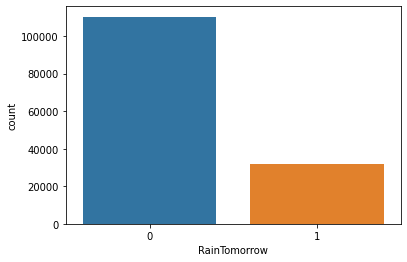

In [0]:
import seaborn as sns
target = data['RainTomorrow']
sns.countplot(data['RainTomorrow'])

In [0]:
# Getting the count and percentage column by using target column

counts = data.RainTomorrow.value_counts()
percentage = data.RainTomorrow.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

,Counts,Percentage
0,110316,77.6%
1,31877,22.4%


In [0]:
from sklearn.model_selection import train_test_split
import pandas as pd
y = data.loc[:,'RainTomorrow']
y_dropped = data.drop('RainTomorrow', axis=1)
X = y_dropped.loc[:,:]

for c in X.columns:
    col_type= X[c].dtype
    if col_type == "object" or col_type.name=="category":
        X[c] = X[c].astype("category")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(99535, 24) (42658, 24) (99535,) (42658,)


# **FEATURE IMPORTANCE - LGBM** 




#### **FEATURE IMPORTANCE WITHOUT GAIN**

Without Gain refers the importance of the features according to the branching of the tree.

In [0]:
import lightgbm as lgb


fit_params={"early_stopping_rounds":10, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 1000 define only the absolute maximum
clf = lgb.LGBMClassifier(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1)

#force larger number of max trees and smaller learning rate
clf.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.892054
[200]	valid's auc: 0.89658
[300]	valid's auc: 0.898335
[400]	valid's auc: 0.899656
Early stopping, best iteration is:
[462]	valid's auc: 0.900184


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.9,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               metric='None', min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=15,
               objective=None, random_state=314, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=0.9, subsample_for_bin=200000,
               subsample_freq=0)

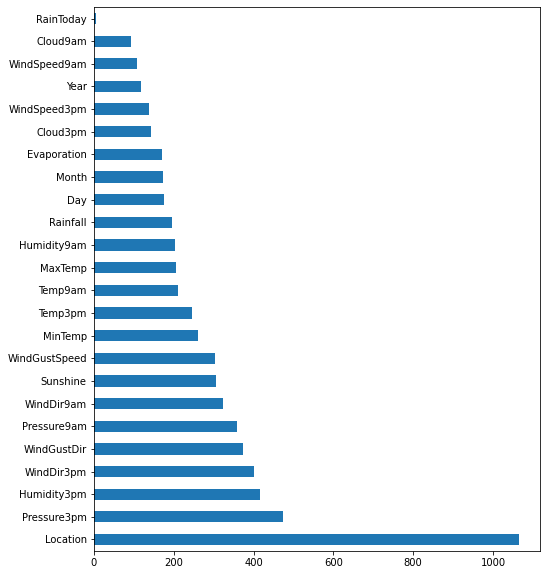

In [0]:
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

#### **FEATURE IMPORTANCE WITH GAIN**

With Gain refers the importance of the features according to the gain in each branch

In [0]:
class LGBMClassifier_GainFE(lgb.LGBMClassifier):
    @property 
    # We used @property decorator to give "special" functionality such as deleters to certain methods
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

clf2 = LGBMClassifier_GainFE(num_leaves= 15, max_depth=-1, 
                         random_state=314, 
                         silent=True, 
                         metric='None', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.1) 

clf2.fit(X_train, y_train, **fit_params)

Training until validation scores don't improve for 10 rounds.
[100]	valid's auc: 0.892054
[200]	valid's auc: 0.89658
[300]	valid's auc: 0.898335
[400]	valid's auc: 0.899656
Early stopping, best iteration is:
[462]	valid's auc: 0.900184


LGBMClassifier_GainFE(boosting_type='gbdt', class_weight=None,
                      colsample_bytree=0.9, importance_type='split',
                      learning_rate=0.1, max_depth=-1, metric='None',
                      min_child_samples=20, min_child_weight=0.001,
                      min_split_gain=0.0, n_estimators=1000, n_jobs=4,
                      num_leaves=15, objective=None, random_state=314,
                      reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.9,
                      subsample_for_bin=200000, subsample_freq=0)

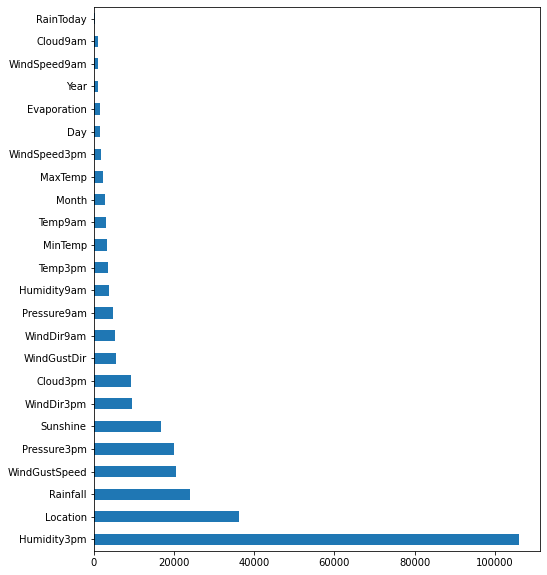

In [0]:
feat_imp = pd.Series(clf2.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [0]:
for c in X_train.columns:
    col_type= X_train[c].dtype
    if col_type.name=="category":
        X_train[c] = X_train[c].astype("object")

# **VISUALIZATION OF MISSING DATA**

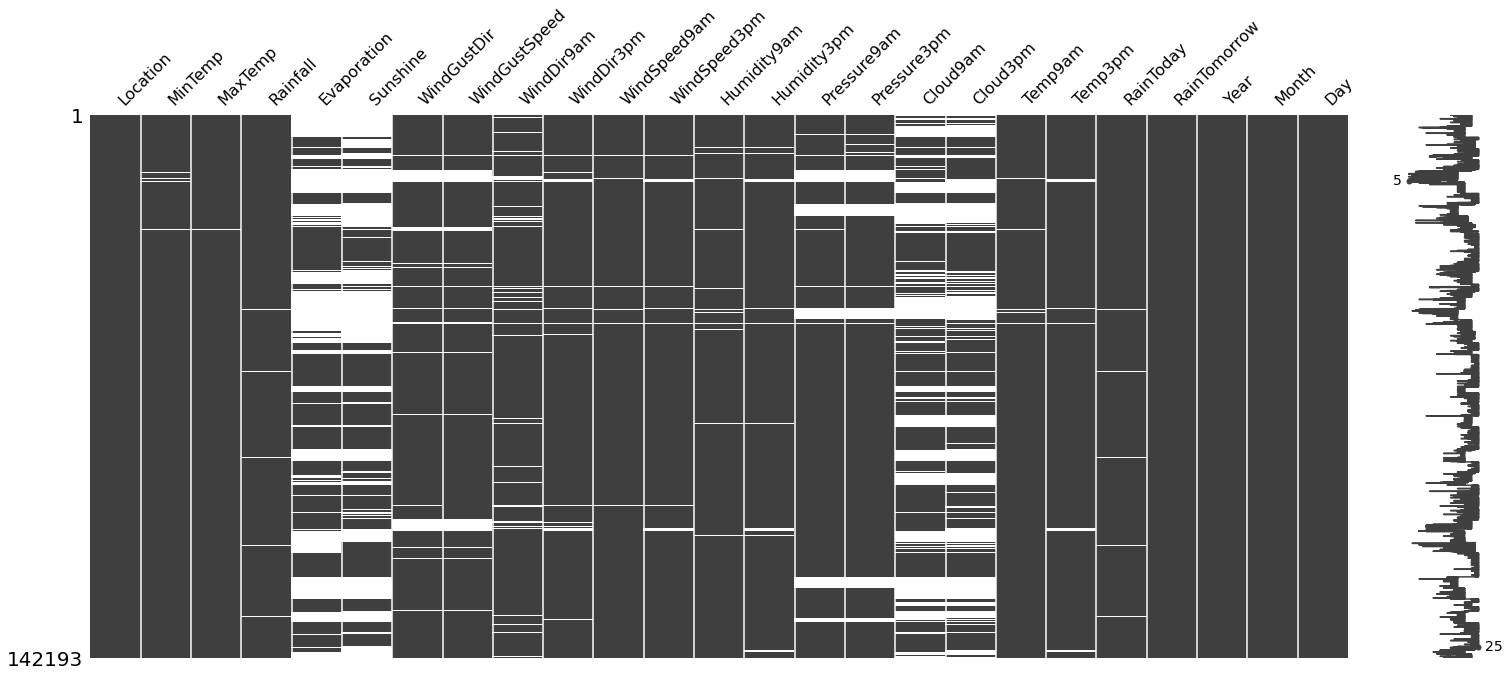

In [0]:
import missingno as msno
msno.matrix(data)

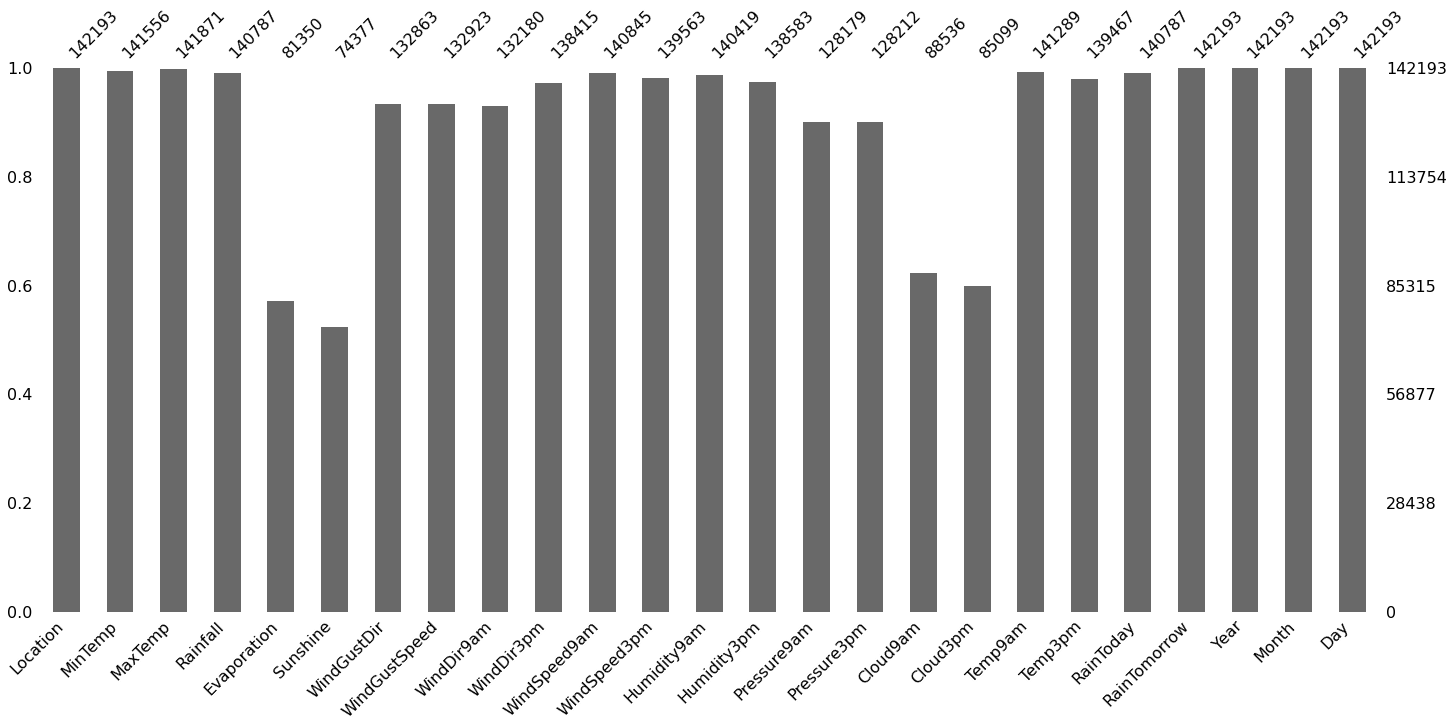

In [0]:
msno.bar(data)

# **OUTLIER DETECTION - DATA VISUALIZATION**

##### **DETERMINATION OF QUANTILE FOR EACH COLUMN**

In [0]:
sparse_columns2=[]
for col in numerical_columns:
  if (X_train[col].mode()[0]==X_train[col].quantile(0.01)==X_train[col].quantile(0.25)):
    sparse_columns2.append(col)

sparse_columns=[]
for col in numerical_columns:
    if (X_train[col].mode()[0]==X_train[col].quantile(0.99)==X_train[col].quantile(0.75)):
        sparse_columns.append(col)
len(sparse_columns)

0

In [0]:
left_skewed_columns = []
for col in numerical_columns:
  if X_train.loc[X_train[col]!=X_train[col].mode()[0],col].median() < -1:
    left_skewed_columns.append(col)
left_skewed_columns

[]

##### **VISUALIZATION OF OUTLIERS FOR EACH COLUMN**

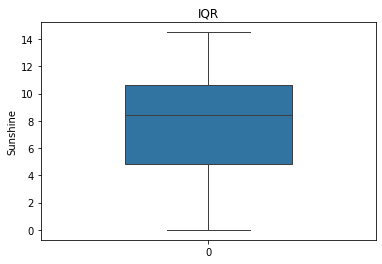

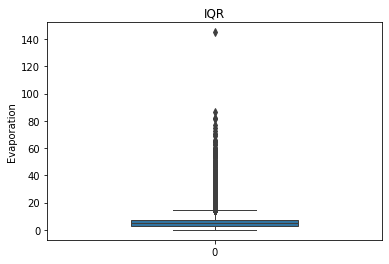

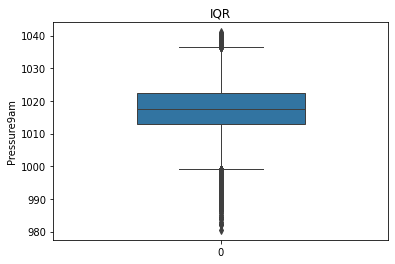

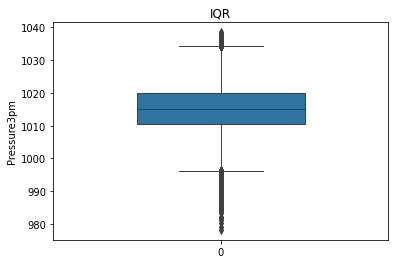

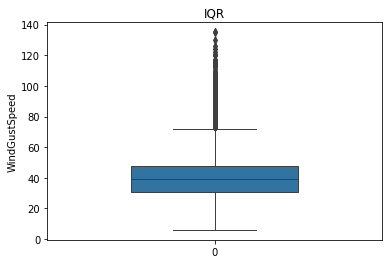

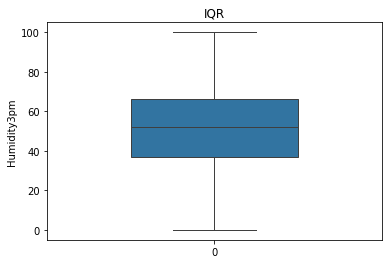

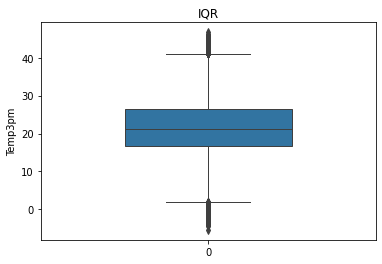

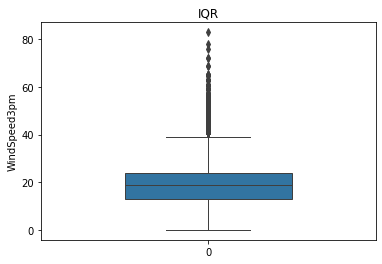

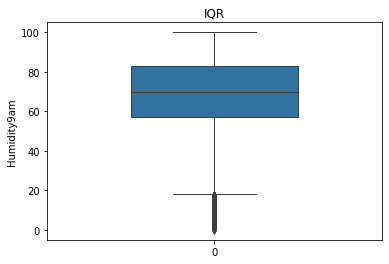

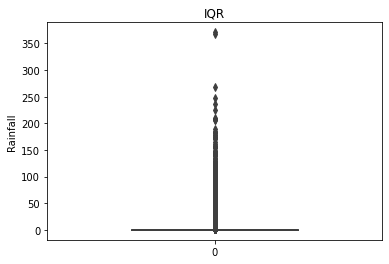

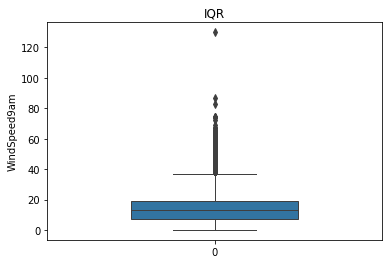

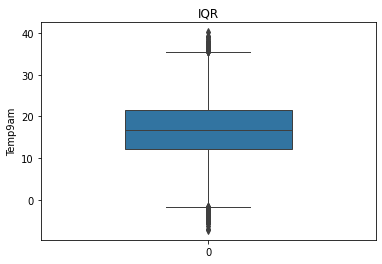

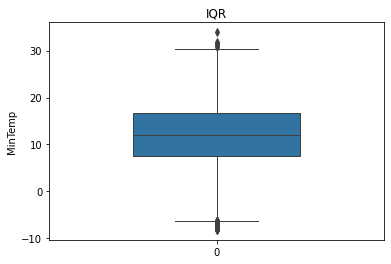

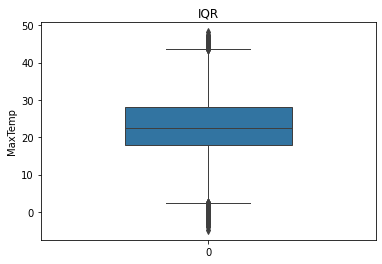

In [0]:
import seaborn as sns
%matplotlib inline
for col in numerical_columns:
  sns.boxplot(data = [X_train[col]], linewidth = 1, width = 0.5) 
  plt.ylabel(col)
  plt.title("IQR")
  plt.show()

##### **DETERMINATION LOWER AND UPPER BOUND FOR EACH COLUMN**

In [0]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

In [0]:
for col in numerical_columns:
  if col in sparse_columns:
    nonsparse_data = pd.DataFrame(X_train[X_train[col] !=X_train[col].mode()[0]][col])           
    if nonsparse_data[col].quantile(0.25) < X_train[col].mode()[0]: #Unexpected case
      lower_bound_sparse = nonsparse_data[col].quantile(0.25)
    else:
      lower_bound_sparse = X_train[col].mode()[0]
    
    if nonsparse_data[col].quantile(0.75) < X_train[col].mode()[0]: #Unexpected case
      upper_bound_sparse = X_train[col].mode()[0]
    else:
      upper_bound_sparse = nonsparse_data[col].quantile(0.75)

    number_of_outliers = len(X_train[(X_train[col] < lower_bound_sparse) | (X_train[col] > upper_bound_sparse)][col])

    if number_of_outliers > 0:

      X_train.loc[X_train[col] < lower_bound_sparse,col] = lower_bound_sparse*0.75 #--> MAIN DF CHANGED

      X_train.loc[X_train[col] > upper_bound_sparse,col] = upper_bound_sparse*1.25 # --> MAIN DF CHANGED
  else:
    lower_bound = X_train[col].quantile(0.25) - 1.5*IQR[col]
    upper_bound = X_train[col].quantile(0.75) + 1.5*IQR[col]
    
    X_train[col] = np.where(X_train[col] > upper_bound, 1.25*upper_bound, X_train[col])
    X_train[col] = np.where(X_train[col] < lower_bound, 0.75*lower_bound, X_train[col])

    X_test[col] = np.where(X_test[col] > upper_bound, 1.25*upper_bound, X_test[col])
    X_test[col] = np.where(X_test[col] < lower_bound, 0.75*lower_bound, X_test[col])

X_train_outlier_cleaned = X_train.copy()
X_test_outlier_cleaned = X_test.copy()

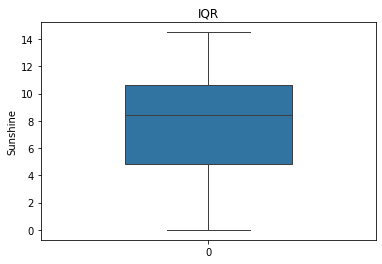

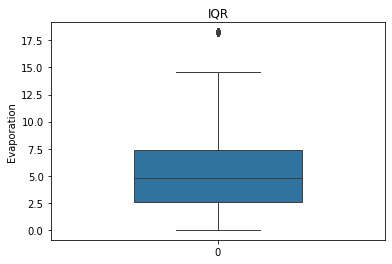

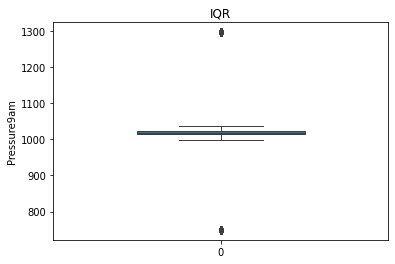

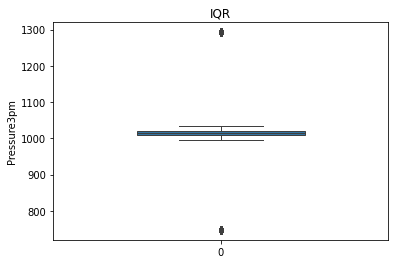

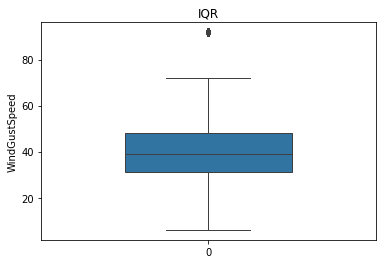

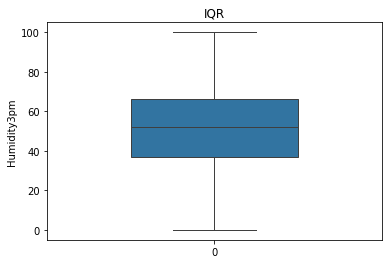

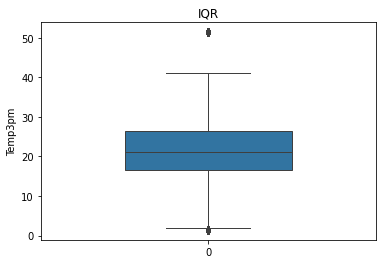

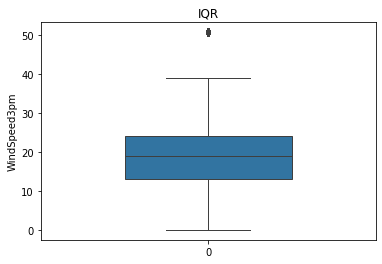

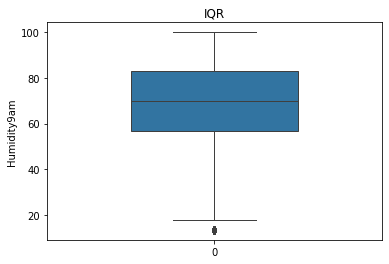

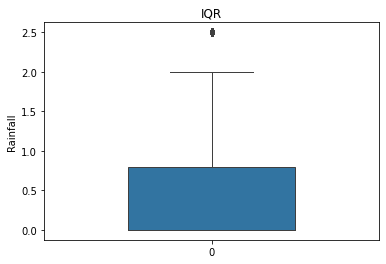

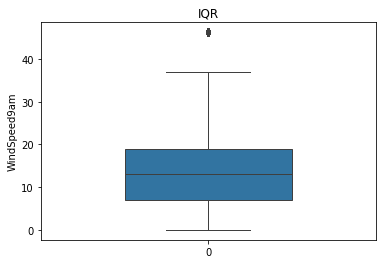

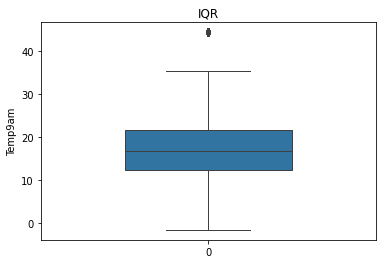

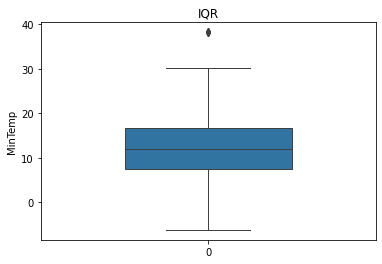

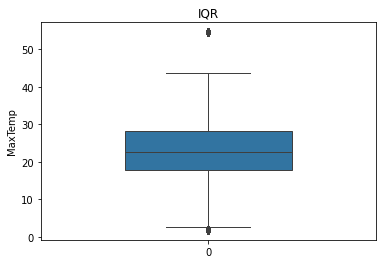

In [0]:
for col in numerical_columns:
  sns.boxplot(data = [X_train_outlier_cleaned[col]], linewidth = 1, width = 0.5) 
  plt.ylabel(col)
  plt.title("IQR")
  plt.show()

## **CORRELATION HEATMAP**

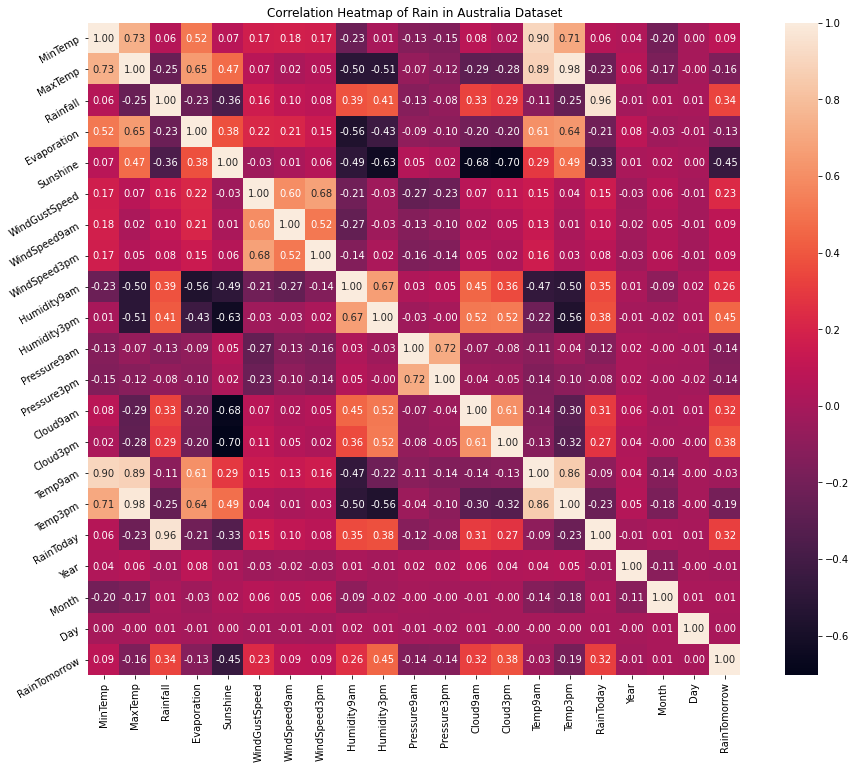

In [0]:
correlation = pd.concat([X_train_outlier_cleaned,y_train],axis=1).corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

## **PLOTTING CATEGORICAL & NUMERICAL DATA**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3d677c18>,
      dtype=object)

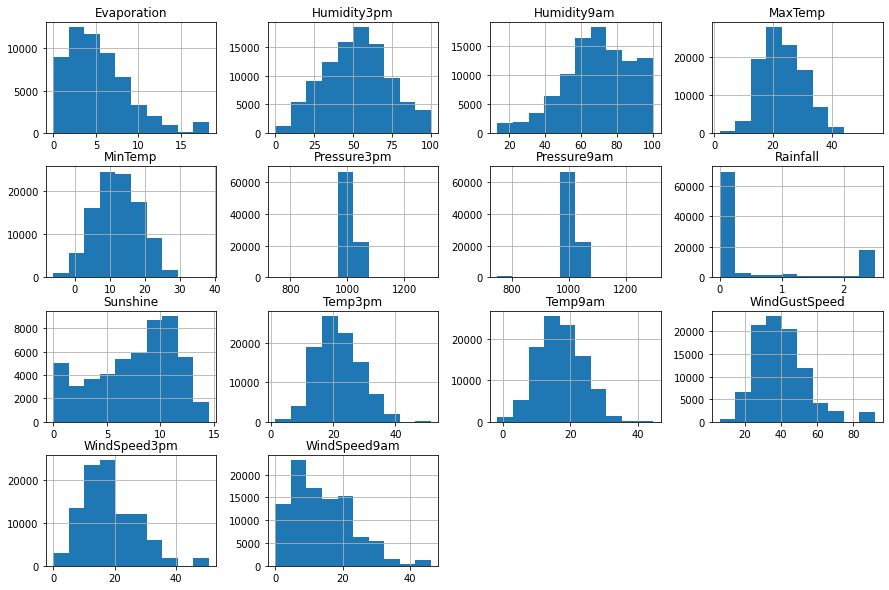

In [0]:
import matplotlib.pyplot as plt

#plot histogram to check distribution for numerical columns

X_train_outlier_cleaned[numerical_columns].hist(figsize=(15,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5b3de34940>,
      dtype=object)

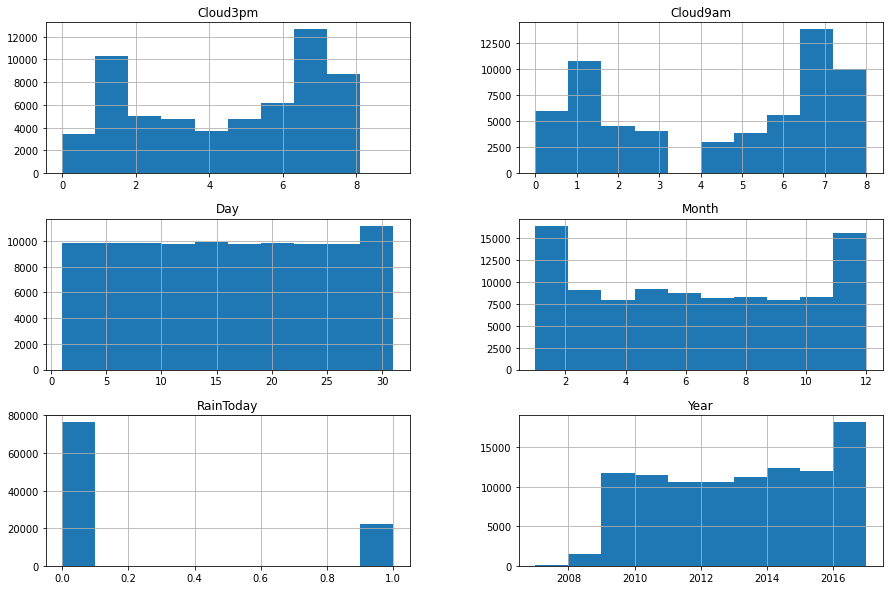

In [0]:
import matplotlib.pyplot as plt

#plot histogram to check distribution for categorical columns

X_train_outlier_cleaned[categorical_columns].hist(figsize=(15,10))

The blue points in here  show that the weather isn't rainy for today. 

The orange points in here show that the weather is rainy for today. 

In terms of feature importance, we chose that these features affect the target too much. 

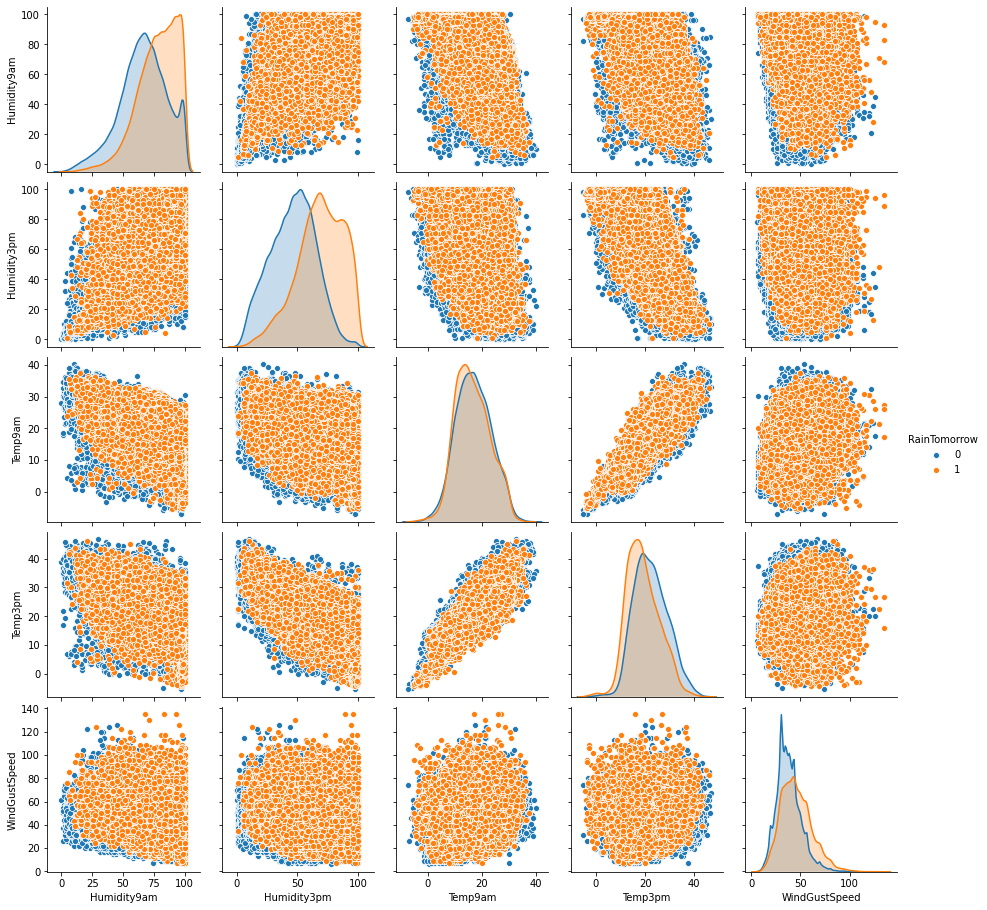

In [0]:
sns.pairplot(data,hue = "RainTomorrow", vars= ['Humidity9am', 'Humidity3pm','Temp9am', 'Temp3pm','WindGustSpeed'])

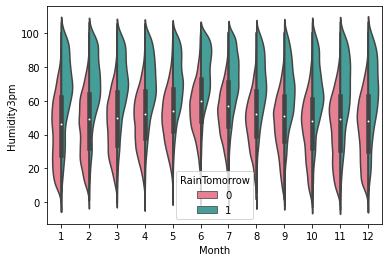

In [0]:
sns.violinplot(x="Month", y="Humidity3pm",hue = target, data = X_train_outlier_cleaned, palette ="husl",split="True")

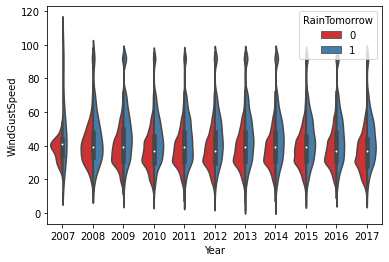

In [0]:
sns.violinplot(x="Year", y="WindGustSpeed",hue = target, data = X_train_outlier_cleaned, palette ="Set1",split="True")

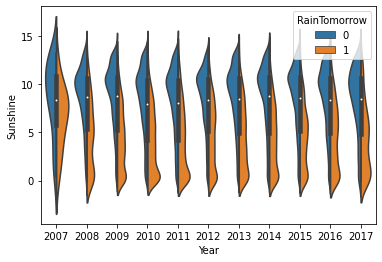

In [0]:
sns.violinplot(x="Year", y="Sunshine",hue = target, data = X_train_outlier_cleaned,split="True")

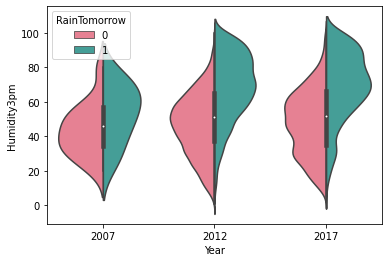

In [0]:
# Humidity3pm difference between 2007,2012, 2017
sns.violinplot(x="Year" , y="Humidity3pm", hue= target, data = X_train_outlier_cleaned, order = [2007,2012,2017],palette = "husl",split=True)

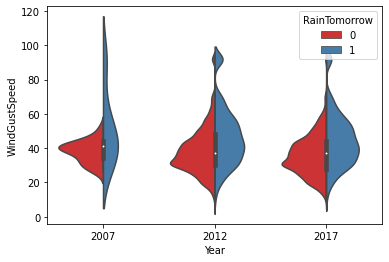

In [0]:
# WindGustSpeed difference between 2007,2012, 2017
sns.violinplot(x="Year" , y="WindGustSpeed", hue= target, data = X_train_outlier_cleaned, order =[2007,2012,2017], palette = "Set1",split=True)

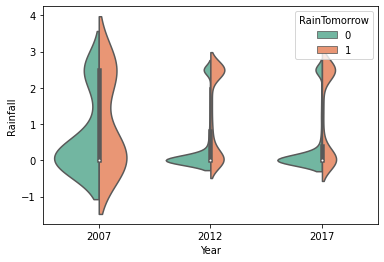

In [0]:
# Rainfall difference between 2007,2012, 2017
sns.violinplot(x="Year" , y="Rainfall", hue= target, data = X_train_outlier_cleaned, order =[2007,2012,2017],palette = "Set2",split=True)

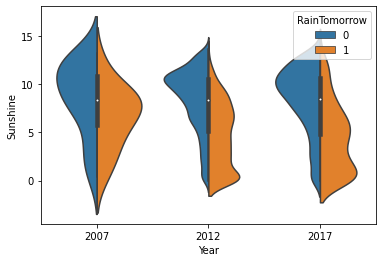

In [0]:
# Sunshine difference between 2007,2012, 2017
sns.violinplot(x="Year" , y="Sunshine", hue= target, data = X_train_outlier_cleaned, order =[2007,2012,2017],split=True)

# **COMPARISON ACCURACY OF DIFFERENT CLASSIFICATION ALGORITHMS WITH SIMPLE IMPUTATION**

In [0]:
X_train1 = X_train_outlier_cleaned.copy()
X_test1 = X_test_outlier_cleaned.copy()

In [0]:
for col in numerical_columns:
  X_train1[col].fillna(value=(X_train[col].mean()),inplace=True)
  X_test1[col].fillna(value=(X_train[col].mean()),inplace=True)
for col in categorical_columns:
  X_train1[col].fillna(value=(X_train[col].value_counts().idxmax()),inplace=True)
  X_test1[col].fillna(value=(X_train[col].value_counts().idxmax()),inplace=True)

In [0]:
variable_list = ['Location','Month','WindGustDir','WindDir9am','WindDir3pm','Cloud9am','Cloud3pm']
target_name = 'RainTomorrow'

from sklearn.model_selection import KFold
X_train1 = pd.concat([X_train1,y_train],axis=1).copy()
kf = KFold(n_splits=3, shuffle=False, random_state=2020)
encoded_name_dict = {}
for col in variable_list:
  col_mean_name = str(col) + '_' + 'Kfold_Mean_Enc'
  encoded_name_dict[col] = col_mean_name
  X_train1[col_mean_name] = np.nan
  X_test1[col_mean_name] = np.nan
  for tr_ind, val_ind in kf.split(X_train1):
    X_tr, X_val = X_train1.iloc[tr_ind], X_train1.iloc[val_ind]
    X_train1.loc[X_train1.index[val_ind], col_mean_name] = X_val[col].map(X_tr.groupby(col)[target_name].mean())
X_train1['Cloud3pm_Kfold_Mean_Enc'].fillna(value=(X_train1['Cloud3pm_Kfold_Mean_Enc'].mean()),inplace=True)
 # X_train.loc[:,col_mean_name] = X_train[col].map(X_train.groupby(col)[col_mean_name].mean())

for i in encoded_name_dict:
  mean = 0
  mean =  X_train1[[i,encoded_name_dict[i]]].groupby(i).mean().reset_index() 
  mean_dict = {}
  for index, row in mean.iterrows():
    mean_dict[row[i]] = row[encoded_name_dict[i]]
  X_test1[encoded_name_dict[i]] = X_test1[i]
  X_test1 = X_test1.replace({encoded_name_dict[i]:mean_dict})

X_train1 = X_train1.drop(columns=[target_name])
X_train1 = X_train1.drop(columns=variable_list)
X_test1 = X_test1.drop(columns=variable_list) 

In [0]:
from sklearn.preprocessing import StandardScaler
for col in X_train1.columns:
  scaler_fitted = StandardScaler().fit(np.array(X_train1[col]).reshape(-1,1))
  X_train1[col] = scaler_fitted.transform(np.array(X_train1[col]).reshape(-1,1))
  X_test1[col] = scaler_fitted.transform(np.array(X_test1[col]).reshape(-1,1))

In [0]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
!pip3 install catboost
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

     |████████████████████████████████| 64.4MB 64kB/s 


In [0]:
rfc1 = RandomForestClassifier()
rfc1.fit(X_train1,y_train)

lgbm1 = LGBMClassifier()
lgbm1.fit(X_train1,y_train)

catboost1 = CatBoostClassifier()
catboost1.fit(X_train1,y_train)

logreg1 = LogisticRegression()
logreg1.fit(X_train1,y_train)

mlp1 = MLPClassifier()
mlp1.fit(X_train1,y_train)

xgb1 = XGBClassifier()
xgb1.fit(X_train1,y_train)

dt1 = DecisionTreeClassifier()
dt1.fit(X_train1,y_train)

CATBOOST: ROC AUC = %89.46
LGBM: ROC AUC= % 88.62
RFC: ROC AUC= % 88.46
MLP: ROC AUC= % 88.03
XGB: ROC AUC= % 87.05
LOGREG: ROC AUC= % 85.62
DT: ROC AUC= % 70.31
No Skill: ROC AUC= % 50.00


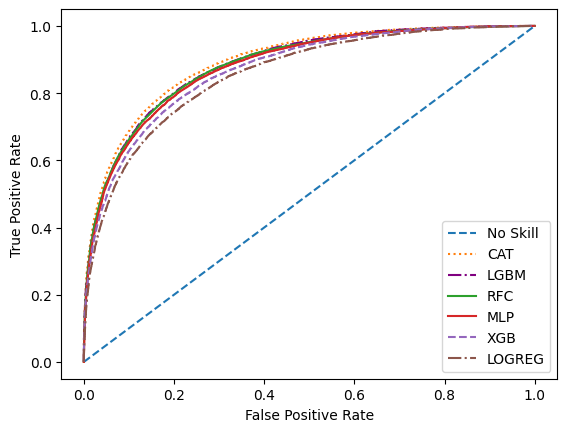

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

rfc1_probs = rfc1.predict_proba(X_test1)
rfc1_probs = rfc1_probs[:, 1]
rfc1_auc = roc_auc_score(y_test, rfc1_probs)
rfc1_fpr, rfc1_tpr, _ = roc_curve(y_test, rfc1_probs)

lgbm1_probs = lgbm1.predict_proba(X_test1)
lgbm1_probs = lgbm1_probs[:, 1]
lgbm1_auc = roc_auc_score(y_test, lgbm1_probs)
lgbm1_fpr, lgbm1_tpr, _ = roc_curve(y_test, lgbm1_probs)

catboost1_probs = catboost1.predict_proba(X_test1)
catboost1_probs = catboost1_probs[:, 1]
catboost1_auc = roc_auc_score(y_test, catboost1_probs)
catboost1_fpr, catboost1_tpr, _ = roc_curve(y_test, catboost1_probs)

logreg1_probs = logreg1.predict_proba(X_test1)
logreg1_probs = logreg1_probs[:, 1]
logreg1_auc = roc_auc_score(y_test, logreg1_probs)
logreg1_fpr, logreg1_tpr, _ = roc_curve(y_test, logreg1_probs)

mlp1_probs = mlp1.predict_proba(X_test1)
mlp1_probs = mlp1_probs[:, 1]
mlp1_auc = roc_auc_score(y_test, mlp1_probs)
mlp1_fpr, mlp1_tpr, _ = roc_curve(y_test, mlp1_probs)

xgb1_probs = xgb1.predict_proba(X_test1)
xgb1_probs = xgb1_probs[:, 1]
xgb1_auc = roc_auc_score(y_test, xgb1_probs)
xgb1_fpr, xgb1_tpr, _ = roc_curve(y_test, xgb1_probs)

dt1_probs = dt1.predict_proba(X_test1)
dt1_probs = dt1_probs[:, 1]
dt1_auc = roc_auc_score(y_test,dt1_probs)
dt1_fpr, dt1_tpr, _ = roc_curve(y_test, dt1_probs)

print('CATBOOST: ROC AUC = %{:.2f}'.format((catboost1_auc)*100))
print('LGBM: ROC AUC= % {:.2f}'.format((lgbm1_auc)*100))
print('RFC: ROC AUC= % {:.2f}'.format((rfc1_auc)*100))
print('MLP: ROC AUC= % {:.2f}'.format((mlp1_auc)*100))
print('XGB: ROC AUC= % {:.2f}'.format((xgb1_auc)*100))
print('LOGREG: ROC AUC= % {:.2f}'.format((logreg1_auc)*100))
print('DT: ROC AUC= % {:.2f}'.format((dt1_auc)*100))
print('No Skill: ROC AUC= % {:.2f}'.format((ns_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(catboost1_fpr,catboost1_tpr,linestyle=':',label='CAT')
plt.plot(lgbm1_fpr, lgbm1_tpr, linestyle='-.', color='purple', label='LGBM')
plt.plot(rfc1_fpr, rfc1_tpr, linestyle='-', label='RFC')
plt.plot(mlp1_fpr, mlp1_tpr, linestyle='-', label='MLP')
plt.plot(xgb1_fpr, xgb1_tpr, linestyle='--', label='XGB')
plt.plot(logreg1_fpr, logreg1_tpr, linestyle='-.', label='LOGREG')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **MISSING VALUE IMPUTATION**

We determined the variable lists according to "Missing Value Handling Mindmap.

In [0]:
Zero_MR_variables_list = list(data_info[data_info['%_Missing_Value']==0]['Variable'])
Low_MR_variables_list = list(data_info[(data_info['%_Missing_Value']>0)&
                                       (data_info['%_Missing_Value']<=0.05)]['Variable'])
Moderate_MR_variables_list = list(data_info[(data_info['%_Missing_Value']>0.05)&\
                                                      (data_info['%_Missing_Value']<=0.25)]['Variable'])
High_MR_variables_list = list(data_info[(data_info['%_Missing_Value']>0.25)&\
                                                  (data_info['%_Missing_Value']<=0.37)]['Variable'])
Extreme_MR_variables_list = list(data_info[(data_info['%_Missing_Value']>0.37)&
                                           (data_info['%_Missing_Value']<=0.95)]['Variable'])
Drop_MR_variables_list = list(data_info[data_info['%_Missing_Value']>0.95]['Variable'])

## **MEAN ENCODING**

We used Mean Encoding Imputation for Categorical Variables in our dataset. 

The main point of this imputation is average of target column which is "RainTomorrow".

In [0]:
variable_list = ['Location','Month']
target_name = 'RainTomorrow'
X_train = X_train_outlier_cleaned.copy()
X_test = X_test_outlier_cleaned.copy()

from sklearn.model_selection import KFold
X_train = pd.concat([X_train,y_train],axis=1).copy()
kf = KFold(n_splits=3, shuffle=False, random_state=2020)
encoded_name_dict = {}
for col in variable_list:
  col_mean_name = str(col) + '_' + 'Kfold_Mean_Enc'
  encoded_name_dict[col] = col_mean_name
  X_train[col_mean_name] = np.nan
  X_test[col_mean_name] = np.nan
  for tr_ind, val_ind in kf.split(X_train):
    X_tr, X_val = X_train.iloc[tr_ind], X_train.iloc[val_ind]
    X_train.loc[X_train.index[val_ind], col_mean_name] = X_val[col].map(X_tr.groupby(col)[target_name].mean())
 # X_train.loc[:,col_mean_name] = X_train[col].map(X_train.groupby(col)[col_mean_name].mean())

for i in encoded_name_dict:
  mean = 0
  mean =  X_train[[i,encoded_name_dict[i]]].groupby(i).mean().reset_index() 
  mean_dict = {}
  for index, row in mean.iterrows():
    mean_dict[row[i]] = row[encoded_name_dict[i]]
  X_test[encoded_name_dict[i]] = X_test[i]
  X_test = X_test.replace({encoded_name_dict[i]:mean_dict})

X_train = X_train.drop(columns=[target_name])
X_train = X_train.drop(columns=variable_list)
X_test = X_test.drop(columns=variable_list) 

In [0]:
numerical_columns.append('Location_Kfold_Mean_Enc')
numerical_columns.append('Month_Kfold_Mean_Enc')
categorical_columns = list(set(categorical_columns)-set(variable_list))

## ***SIMPLE IMPUTATION***


We used Simple Imputation for Numerical Variables in our dataset. 

We determined the missing values in both train and test data according to the percentage distribution of unique values in the train data.

In [0]:
X_train_outlier_cleaned = X_train.copy()
X_test_outlier_cleaned = X_test.copy()

In [0]:
def SimpleImputers(df_train,df_test,data_info,variable_list):  
  from sklearn.impute import SimpleImputer  
  for col in variable_list:
    count_nan_train = 0
    count_nan_train = df_train[col].isnull().sum()

    count_nan_test = 0
    count_nan_test = df_test[col].isnull().sum()
    if col in numerical_columns:
      average_train = 0
      average_train = df_train[col].mean()

      std_train = 0
      std_train = df_train[col].std()

      rand_train = 0
      rand_train = np.random.normal(loc=average_train, scale=std_train, size=count_nan_train)

      rand_test = 0
      rand_test = np.random.normal(loc=average_train, scale=std_train, size=count_nan_test)

      col_slice_train = 0
      col_slice_train = pd.Series(df_train[col].copy())

      col_slice_test = 0
      col_slice_test = pd.Series(df_test[col].copy())

      col_slice_train[pd.isnull(col_slice_train)] = rand_train
      col_slice_test[pd.isnull(col_slice_test)] = rand_test

      df_train[col] = col_slice_train
      df_test[col] = col_slice_test

    elif col in categorical_columns:
      df_train.loc[df_train.loc[:,col].isnull(),col] = np.random.choice(sorted(list(df_train.loc[:,col].dropna().unique())),
                                                            size=int(df_train.loc[df_train.loc[:,col].isnull(),col].shape[0]),
                                                            p=[pd.Series(df_train.groupby(col).size()/df_train.loc[:,col].dropna().shape[0]).iloc[i] for i in 
                                                               np.arange(0,len(df_train.loc[:,col].dropna().unique()))])
      
      df_test.loc[df_test.loc[:,col].isnull(),col] = np.random.choice(sorted(list(df_train.loc[:,col].dropna().unique())),
                                                               size=int(df_test.loc[df_test.loc[:,col].isnull(),col].shape[0]),
                                                               p=[pd.Series(df_test.groupby(col).size()/df_test.loc[:,col].dropna().shape[0]).iloc[i] for i in 
                                                               np.arange(0,len(df_test.loc[:,col].dropna().unique()))])

  print("TRAİN DATADA Number of null values: \n", df_train[variable_list].isnull().sum())
  print("TEST DATADA Number of null values: \n", df_test[variable_list].isnull().sum())

SimpleImputers(X_train_outlier_cleaned,X_test_outlier_cleaned,data_info,Low_MR_variables_list)  # --> MAIN DF CHANGED

TRAİN DATADA Number of null values: 
 WindDir3pm      0
Humidity3pm     0
Temp3pm         0
WindSpeed3pm    0
Humidity9am     0
Rainfall        0
RainToday       0
WindSpeed9am    0
Temp9am         0
MinTemp         0
MaxTemp         0
dtype: int64
TEST DATADA Number of null values: 
 WindDir3pm      0
Humidity3pm     0
Temp3pm         0
WindSpeed3pm    0
Humidity9am     0
Rainfall        0
RainToday       0
WindSpeed9am    0
Temp9am         0
MinTemp         0
MaxTemp         0
dtype: int64



*ENCODING IMPUTED CATEGORICAL FEATURES : WINDDIR3PM*






In [0]:
categorical_columns = list(set(categorical_columns)-set(['WindDir3pm','Location','Month']))

X_train_outlier_cleaned = pd.concat([X_train_outlier_cleaned[numerical_columns], 
                                     X_train_outlier_cleaned[categorical_columns],
                                     pd.get_dummies(X_train_outlier_cleaned.WindDir3pm)], axis=1)

X_test_outlier_cleaned = pd.concat([X_test_outlier_cleaned[numerical_columns], 
                                    X_test_outlier_cleaned[categorical_columns],
                                    pd.get_dummies(X_test_outlier_cleaned.WindDir3pm)], axis=1)

## ***STRING CONVERSION IMPUTATION***

In [0]:
from sklearn import base
from sklearn.model_selection import KFold
class KFoldTargetEncoderTrain(base.BaseEstimator,
                               base.TransformerMixin):
    def __init__(self,colnames,targetName,
                  n_fold=5, verbosity=True,
                  discardOriginal_col=False):
        self.colnames = colnames
        self.targetName = targetName
        self.n_fold = n_fold
        self.verbosity = verbosity
        self.discardOriginal_col = discardOriginal_col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self,X):
        assert(type(self.targetName) == str)
        assert(type(self.colnames) == str)
        assert(self.colnames in X.columns)
        assert(self.targetName in X.columns)
        
        mean_of_target = X[self.targetName].mean()
        kf = KFold(n_splits = self.n_fold,
                   shuffle = False, random_state=2020)
        col_mean_name = self.colnames + '_' + 'Kfold_Target_Enc'
        X[col_mean_name] = np.nan
        for tr_ind, val_ind in kf.split(X):
            X_tr, X_val = X.iloc[tr_ind], X.iloc[val_ind]
            X.loc[X.index[val_ind], col_mean_name] = \
            X_val[self.colnames].map(X_tr.groupby(self.colnames)
                                     [self.targetName].mean())
            X[col_mean_name].fillna(mean_of_target, inplace = True)
        if self.verbosity:
            encoded_feature = X[col_mean_name].values
            print('Correlation between the new feature, {} and, {} is {}.'\
                  .format(col_mean_name,self.targetName,
                          np.corrcoef(X[self.targetName].values,
                                      encoded_feature)[0][1]))
        if self.discardOriginal_col:
            X = X.drop(self.targetName, axis=1)
        return X

In [0]:
lst = ['WindDir9am','WindGustDir']
encoded_name_dict = {"WindDir9am":"WindDir9am_Kfold_Target_Enc","WindGustDir":"WindGustDir_Kfold_Target_Enc"}

def StringConverter(df, target_name, variable_list):  
  for col in variable_list:
    targetc = KFoldTargetEncoderTrain(col,target_name,n_fold=3)
    new_train = targetc.fit_transform(df)
  return new_train

In [0]:
df_deneme_train = pd.concat([X_train_outlier_cleaned,y_train],axis=1).copy()
df_output_train = StringConverter(df=df_deneme_train,target_name="RainTomorrow",variable_list=lst)
print(df_output_train.loc[:,["WindDir9am_Kfold_Target_Enc","WindGustDir_Kfold_Target_Enc"]].isnull().sum())
df_output_train.loc[:,["WindDir9am_Kfold_Target_Enc","WindGustDir_Kfold_Target_Enc"]]

Correlation between the new feature, WindDir9am_Kfold_Target_Enc and, RainTomorrow is 0.12372598459651347.
Correlation between the new feature, WindGustDir_Kfold_Target_Enc and, RainTomorrow is 0.10307387251350773.
WindDir9am_Kfold_Target_Enc     0
WindGustDir_Kfold_Target_Enc    0
dtype: int64


,WindDir9am_Kfold_Target_Enc,WindGustDir_Kfold_Target_Enc
118102,0.224564,0.222605
18630,0.264388,0.224802
127854,0.307141,0.203080
112595,0.144784,0.167707
108492,0.144784,0.224564
...,...,...
110268,0.270846,0.266538
119879,0.237986,0.197919
103694,0.216216,0.227137
131932,0.177179,0.167453


In [0]:
for i in encoded_name_dict:
  print(i)
  mean = 0
  mean =  df_output_train[[i,encoded_name_dict[i]]].groupby(i).mean().reset_index() 
  mean_dict = {}
  
  for index, row in mean.iterrows():
    mean_dict[row[i]] = row[encoded_name_dict[i]]
  X_test_outlier_cleaned[encoded_name_dict[i]] = X_test_outlier_cleaned[i]
  X_test_outlier_cleaned = X_test_outlier_cleaned.replace({encoded_name_dict[i]:mean_dict})
  X_test_outlier_cleaned[encoded_name_dict[i]].fillna(df_output_train[encoded_name_dict[i]].mean(), inplace=True)

df_output_test = X_test_outlier_cleaned.copy()
df_output_train=df_output_train.drop(columns=['WindDir9am','WindGustDir','RainTomorrow'])
df_output_test=df_output_test.drop(columns=['WindDir9am','WindGustDir'])
categorical_columns = list(set(categorical_columns) - set(['WindDir9am','WindGustDir']))
numerical_columns.append('WindDir9am_Kfold_Target_Enc')
numerical_columns.append('WindGustDir_Kfold_Target_Enc')

WindDir9am
WindGustDir


## ***CLUSTERING BASED BINNING***



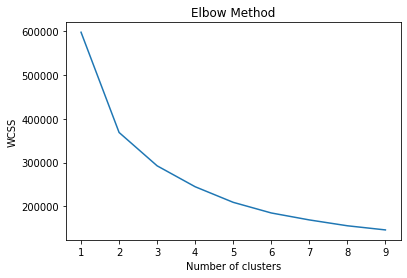

0
0
0
0
0
0
0
0


In [0]:
import sklearn
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df_output_train1=df_output_train[['Temp3pm','Rainfall','MaxTemp','Humidity9am','Humidity3pm','Temp9am']]
df_output_train1_dropna=df_output_train1.dropna()
cluster = StandardScaler().fit_transform(df_output_train1_dropna)
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=400, n_init=10, random_state=0)
    kmeans.fit(cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
km = KMeans(n_clusters=8, max_iter=100).fit(cluster)
pred_y = km.predict(cluster)
df_output_train1_dropna['cluster']=pred_y
clust=df_output_train1_dropna.cluster
clust=clust.reset_index()
data1=df_output_train.reset_index().merge(clust,on='index',how='outer')
df2=data1
col_list = ['Sunshine','Evaporation']
for col in col_list:
    e=data1.groupby('cluster')[col].mean().reset_index()

    for i in e.cluster:
        n=e[e.cluster==i][col]
        data1.loc[(data1.cluster==i)&(data1[col].isna()==True),col]=n[i] 
    print(data1[col].isnull().sum())

col_list = ['Cloud3pm','Cloud9am']
for col in col_list:

    for i in data1.cluster.unique():
        data1.loc[(data1.cluster==i)&(data1[col].isna()==True),col]=data1[data1.cluster==i].groupby(col).index.count().sort_values('index',ascending=False).reset_index().iloc[0,0] 

    print(data1[col].isnull().sum())
    
#Imputation for test
df_output_test1=df_output_test[['Temp3pm','Rainfall','MaxTemp','Humidity9am','Humidity3pm','Temp9am']]
df_output_test1_dropna=df_output_test1.dropna()
cluster_test = StandardScaler().fit_transform(df_output_test1_dropna)
pred_test = km.predict(cluster_test)
df_output_test1_dropna['cluster']=pred_test
clust_test=df_output_test1_dropna.cluster
clust_test=clust_test.reset_index()
data1_test=df_output_test.reset_index().merge(clust_test,on='index',how='outer')
col_list = ['Sunshine','Evaporation']
for col in col_list:
    e=df2.groupby('cluster')[col].mean().reset_index()
    for i in e.cluster:
        n=e[e.cluster==i][col]
        data1_test.loc[(data1_test.cluster==i)&(data1_test[col].isna()==True),col]=n[i] 
    print(data1_test[col].isnull().sum())

col_list = ['Cloud3pm','Cloud9am']
for col in col_list:
  
    for i in data1_test.cluster.unique():
        data1_test.loc[(data1_test.cluster==i)&(data1_test[col].isna()==True),col]=df2[df2.cluster==i].groupby(col).index.count().sort_values('index',ascending=False).reset_index().iloc[0,0]
    print(data1_test[col].isnull().sum())

In [0]:
data1.set_index("index",inplace=True)
data1 = data1.drop(columns=['cluster'])
data1_test.set_index("index", inplace=True)
data1_test = data1_test.drop(columns=['cluster'])

## ***MODEL BASED IMPUTATION***

In [0]:
df_train = data1.copy()
df_test = data1_test.copy()
lst = [item for item in Moderate_MR_variables_list if item in numerical_columns]

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, RobustScaler
from sklearn.neural_network import MLPRegressor
!pip install category_encoders
from category_encoders import BinaryEncoder
for col in numerical_columns:
  scaler_fitted = StandardScaler().fit(np.array(df_train[col]).reshape(-1,1))
  df_train[col] = scaler_fitted.transform(np.array(df_train[col]).reshape(-1,1))
  df_test[col] = scaler_fitted.transform(np.array(df_test[col]).reshape(-1,1))

# MLP IMPUTER
import pandas as pd
import time
print("MLP IMPUTER process has began:\n")
start_time = time.time()

for col in lst:
  y_col_nan_train = df_train.loc[df_train.loc[:,col].isnull(),col]
  y_col_train = df_train.loc[df_train.loc[:,col].notnull(),col]  
  X_col_nan_train = df_train.drop(columns=lst).loc[y_col_nan_train.index,:]
  X_col_train = df_train.drop(columns=lst,axis=1).loc[y_col_train.index,:]

  y_col_nan_test = df_test.loc[df_test.loc[:,col].isnull(),col]
  y_col_test = df_test.loc[df_test.loc[:,col].notnull(),col] 
  X_col_nan_test = df_test.drop(columns=lst).loc[y_col_nan_test.index,:]
  X_col_test = df_test.drop(columns=lst,axis=1).loc[y_col_test.index,:]

  mlp = MLPRegressor(hidden_layer_sizes=(100,10,),
                     activation='tanh',
                     solver='adam',
                     learning_rate='adaptive',
                     max_iter=1000,
                     learning_rate_init=0.01,
                     alpha=0.01,
                     early_stopping = False)
  
  mlp_fitted = mlp.fit(X_col_train,y_col_train)
  y_col_pred_train = mlp_fitted.predict(X_col_nan_train)
  y_col_pred_test = mlp_fitted.predict(X_col_nan_test)
  
  df_train.loc[y_col_nan_train.index,col] = y_col_pred_train
  df_test.loc[y_col_nan_test.index,col] = y_col_pred_test
  
  print(col,"TRAİN null sayisi:",df_train[col].isnull().sum())
  print(col,"TEST null sayisi:",df_train[col].isnull().sum())

print('MLP IMPUTER process has been completed!')
print("--- in %s minutes ---" % ((time.time() - start_time)/60))

     |████████████████████████████████| 102kB 2.0MB/s 
MLP IMPUTER process has began:

Pressure9am TRAİN null sayisi: 0
Pressure9am TEST null sayisi: 0
Pressure3pm TRAİN null sayisi: 0
Pressure3pm TEST null sayisi: 0
WindGustSpeed TRAİN null sayisi: 0
WindGustSpeed TEST null sayisi: 0
MLP IMPUTER process has been completed!
--- in 0.7832816163698832 minutes ---


# **MODELLING**

## ***ENSEMBLED CLASSIFIER***

### ***LIGHT-GBM MODEL***


In [0]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [0]:
lgbm = LGBMClassifier()
lgbm.fit(df_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

No Skill: ROC AUC=%50.000
LGBM: ROC AUC=%88.340


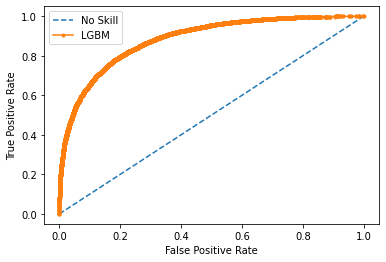

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

lgbm_probs = lgbm.predict_proba(df_test)
lgbm_probs = lgbm_probs[:, 1]
lgbm_auc = roc_auc_score(y_test, lgbm_probs)
lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('LGBM: ROC AUC=%{:.3f}'.format((lgbm_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lgbm_fpr, lgbm_tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
lgbm_tunned = LGBMClassifier()
lgbm_tunned_params = {"boosting_type":['gbdt', 'dart', 'goss', 'rf'],
                      "n_estimators ":[100,200,500],
                      "learning_rate":[0.01,0.1,0.5]}

lgbm_tunned_model = GridSearchCV(lgbm_tunned, lgbm_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(lgbm_tunned_model.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  1.5min finished


{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators ': 100}


In [0]:
lgbm_tunned_auc = lgbm_auc.copy()

In [0]:
#{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'n_estimators ': 100}

### ***XGBOOST MODEL***

In [0]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(df_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

No Skill: ROC AUC=%50.000
XGB: ROC AUC=%86.812


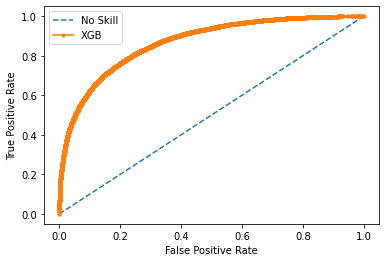

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

xgb_probs = xgb.predict_proba(df_test)
xgb_probs = xgb_probs[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_probs)
xgb_fpr,xgb_tpr, _ = roc_curve(y_test, xgb_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('XGB: ROC AUC=%{:.3f}'.format((xgb_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
xgb_tunned = XGBClassifier()
xgb_tunned_params = {"learning_rate"    : [0.01, 0.10, 0.25 ] ,
                     "max_depth"        : [ 3, 6, 10],
                     "min_child_weight" : [ 1, 3, 7 ],
                     "gamma"            : [ 0.0, 0.1 , 0.3],
                     "colsample_bytree" : [ 0.3, 0.5 , 0.7 ],
                     "booster"          : ['gbtree','gblinear','dart'],
                     "n-jobs"           : [-1]}

xgb_tunned_model = GridSearchCV(xgb_tunned, xgb_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(xgb_tunned_model.best_params_)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 46.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 62.5min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 73.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 176.8min
[Parallel(n_jobs=-1)]: Done 2187 out of 2187 | elapsed: 224.8min finished


{'booster': 'dart', 'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7, 'n-jobs': -1}


In [0]:
#{'booster': 'dart', 'colsample_bytree': 0.7, 'gamma': 0.0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 7, 'n-jobs': -1}

No Skill: ROC AUC=%50.000
XGB: ROC AUC=%86.812
XGB-TUNNED: ROC AUC=%89.142


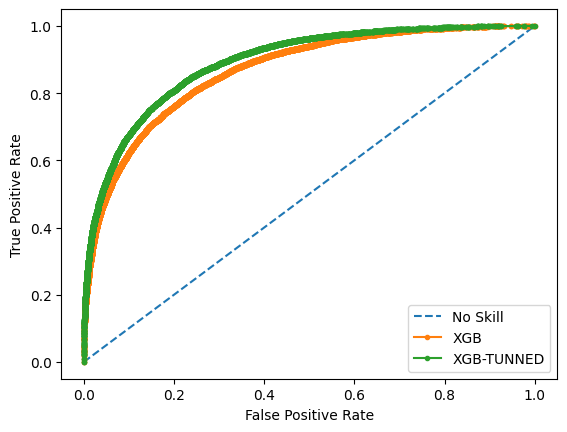

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

xgb_tunned_probs = xgb_tunned_model.predict_proba(df_test)
xgb_tunned_probs = xgb_tunned_probs[:, 1]
xgb_tunned_auc = roc_auc_score(y_test, xgb_tunned_probs)
xgb_tunned_fpr,xgb_tunned_tpr, _ = roc_curve(y_test, xgb_tunned_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('XGB: ROC AUC=%{:.3f}'.format((xgb_auc)*100))
print('XGB-TUNNED: ROC AUC=%{:.3f}'.format((xgb_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGB')
plt.plot(xgb_tunned_fpr, xgb_tunned_tpr, marker='.', label=('XGB-TUNNED'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### ***CATBOOST MODEL***

In [0]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [0]:
catboost = CatBoostClassifier()
catboost.fit(df_train,y_train)

Learning rate set to 0.073463
0:	learn: 0.6412283	total: 33.9ms	remaining: 33.9s
1:	learn: 0.5998476	total: 59.6ms	remaining: 29.7s
2:	learn: 0.5643289	total: 84ms	remaining: 27.9s
3:	learn: 0.5343749	total: 111ms	remaining: 27.7s
4:	learn: 0.5083045	total: 139ms	remaining: 27.6s
5:	learn: 0.4869526	total: 166ms	remaining: 27.5s
6:	learn: 0.4699246	total: 196ms	remaining: 27.8s
7:	learn: 0.4562533	total: 223ms	remaining: 27.6s
8:	learn: 0.4442005	total: 250ms	remaining: 27.5s
9:	learn: 0.4343565	total: 277ms	remaining: 27.4s
10:	learn: 0.4251581	total: 305ms	remaining: 27.4s
11:	learn: 0.4172246	total: 333ms	remaining: 27.4s
12:	learn: 0.4103671	total: 358ms	remaining: 27.2s
13:	learn: 0.4041479	total: 386ms	remaining: 27.2s
14:	learn: 0.3994131	total: 416ms	remaining: 27.3s
15:	learn: 0.3951772	total: 443ms	remaining: 27.2s
16:	learn: 0.3917046	total: 468ms	remaining: 27.1s
17:	learn: 0.3888622	total: 494ms	remaining: 26.9s
18:	learn: 0.3859310	total: 525ms	remaining: 27.1s
19:	learn:

No Skill: ROC AUC=%50.000
CatBoost: ROC AUC=%89.161


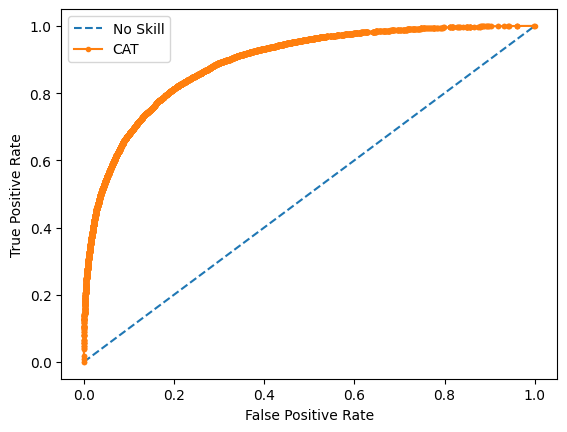

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

catboost_probs = catboost.predict_proba(df_test)
catboost_probs = catboost_probs[:, 1]
catboost_auc = roc_auc_score(y_test, catboost_probs)
catboost_fpr, catboost_tpr, _ = roc_curve(y_test, catboost_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('CatBoost: ROC AUC=%{:.3f}'.format((catboost_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(catboost_fpr, catboost_tpr, marker='.', label='CAT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
catboost_tunned = CatBoostClassifier()
catboost_tunned_params = {'iterations':[10, 1000],
                          'depth': [1, 8],
                          'learning_rate': [0.01, 1.0, 'log-uniform']
}

catboost_tunned_model = GridSearchCV(catboost_tunned, catboost_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(catboost_tunned_model.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.3min finished


0:	learn: 0.6855441	total: 46.6ms	remaining: 46.5s
1:	learn: 0.6779530	total: 83.9ms	remaining: 41.8s
2:	learn: 0.6704841	total: 122ms	remaining: 40.6s
3:	learn: 0.6634350	total: 159ms	remaining: 39.6s
4:	learn: 0.6564261	total: 197ms	remaining: 39.2s
5:	learn: 0.6498557	total: 235ms	remaining: 38.9s
6:	learn: 0.6431476	total: 275ms	remaining: 39.1s
7:	learn: 0.6364220	total: 314ms	remaining: 38.9s
8:	learn: 0.6302520	total: 352ms	remaining: 38.8s
9:	learn: 0.6240024	total: 391ms	remaining: 38.7s
10:	learn: 0.6179713	total: 428ms	remaining: 38.5s
11:	learn: 0.6120018	total: 465ms	remaining: 38.3s
12:	learn: 0.6061735	total: 506ms	remaining: 38.4s
13:	learn: 0.6004133	total: 543ms	remaining: 38.3s
14:	learn: 0.5950831	total: 585ms	remaining: 38.4s
15:	learn: 0.5897518	total: 624ms	remaining: 38.4s
16:	learn: 0.5845590	total: 661ms	remaining: 38.2s
17:	learn: 0.5793634	total: 698ms	remaining: 38.1s
18:	learn: 0.5743563	total: 739ms	remaining: 38.1s
19:	learn: 0.5698286	total: 778ms	remai

In [0]:
from sklearn.model_selection import GridSearchCV
catboost_tunned = CatBoostClassifier()
catboost_tunned_params = {'random_strength': [1e-9, 10, 'log-uniform'],
                          'bagging_temperature': [0.0, 1.0],
                          'border_count': [1, 255],
                          'l2_leaf_reg': [2, 30],
                          'scale_pos_weight':[0.01, 1.0, 'uniform']}

catboost_tunned_model = GridSearchCV(catboost_tunned, catboost_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(catboost_tunned_model.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 32.8min finished


0:	learn: 0.6709138	total: 35.5ms	remaining: 35.5s
1:	learn: 0.6501440	total: 65.2ms	remaining: 32.5s
2:	learn: 0.6306209	total: 91.7ms	remaining: 30.5s
3:	learn: 0.6122764	total: 121ms	remaining: 30.2s
4:	learn: 0.5953822	total: 156ms	remaining: 31s
5:	learn: 0.5796960	total: 185ms	remaining: 30.6s
6:	learn: 0.5660739	total: 213ms	remaining: 30.2s
7:	learn: 0.5525169	total: 245ms	remaining: 30.4s
8:	learn: 0.5403989	total: 275ms	remaining: 30.2s
9:	learn: 0.5288557	total: 304ms	remaining: 30.1s
10:	learn: 0.5184826	total: 334ms	remaining: 30s
11:	learn: 0.5087118	total: 364ms	remaining: 29.9s
12:	learn: 0.4992180	total: 394ms	remaining: 29.9s
13:	learn: 0.4906099	total: 427ms	remaining: 30.1s
14:	learn: 0.4828154	total: 461ms	remaining: 30.3s
15:	learn: 0.4756143	total: 492ms	remaining: 30.2s
16:	learn: 0.4687632	total: 520ms	remaining: 30s
17:	learn: 0.4621417	total: 548ms	remaining: 29.9s
18:	learn: 0.4562634	total: 578ms	remaining: 29.8s
19:	learn: 0.4502578	total: 607ms	remaining:

In [0]:
catboost_tunned = CatBoostClassifier(depth= 8, 
                                     iterations= 1000, 
                                     learning_rate= 0.01,
                                     random_strength=1e-09,
                                     bagging_temperature=0.0,
                                     border_count=255,
                                     l2_leaf_reg=30,
                                     scale_pos_weight=1.0).fit(df_train,y_train)

0:	learn: 0.6851486	total: 43.6ms	remaining: 43.5s
1:	learn: 0.6773256	total: 81.6ms	remaining: 40.7s
2:	learn: 0.6697072	total: 120ms	remaining: 39.9s
3:	learn: 0.6622749	total: 159ms	remaining: 39.6s
4:	learn: 0.6550273	total: 201ms	remaining: 40s
5:	learn: 0.6479901	total: 240ms	remaining: 39.8s
6:	learn: 0.6410155	total: 279ms	remaining: 39.6s
7:	learn: 0.6343781	total: 317ms	remaining: 39.3s
8:	learn: 0.6277637	total: 354ms	remaining: 39s
9:	learn: 0.6214048	total: 396ms	remaining: 39.2s
10:	learn: 0.6151937	total: 437ms	remaining: 39.3s
11:	learn: 0.6092443	total: 474ms	remaining: 39.1s
12:	learn: 0.6033920	total: 514ms	remaining: 39s
13:	learn: 0.5977120	total: 551ms	remaining: 38.8s
14:	learn: 0.5921261	total: 589ms	remaining: 38.7s
15:	learn: 0.5866563	total: 627ms	remaining: 38.6s
16:	learn: 0.5813706	total: 666ms	remaining: 38.5s
17:	learn: 0.5761395	total: 708ms	remaining: 38.6s
18:	learn: 0.5711631	total: 748ms	remaining: 38.6s
19:	learn: 0.5663004	total: 786ms	remaining: 

No Skill: ROC AUC=%50.000
CatBoost: ROC AUC=%89.161
CAT-TUNNED: ROC AUC=%88.086


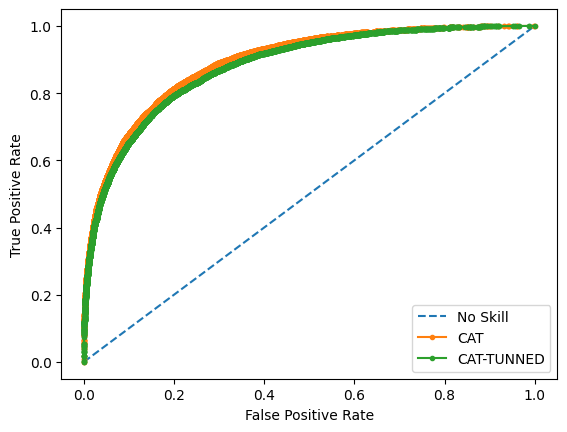

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

catboost_tunned_probs = catboost_tunned.predict_proba(df_test)
catboost_tunned_probs = catboost_tunned_probs[:, 1]
catboost_tunned_auc = roc_auc_score(y_test, catboost_tunned_probs)
catboost_tunned_fpr,catboost_tunned_tpr, _ = roc_curve(y_test, catboost_tunned_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('CatBoost: ROC AUC=%{:.3f}'.format((catboost_auc)*100))
print('CAT-TUNNED: ROC AUC=%{:.3f}'.format((catboost_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(catboost_fpr, catboost_tpr, marker='.', label='CAT')
plt.plot(catboost_tunned_fpr, catboost_tunned_tpr, marker='.', label=('CAT-TUNNED'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ***RANDOM FOREST CLASSIFIER(BAGGING)***

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [0]:
rfc = RandomForestClassifier()
rfc.fit(df_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

No Skill: ROC AUC=%50.000
RFC: ROC AUC= % 88.326


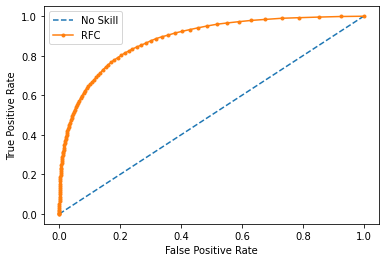

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

rfc_probs = rfc.predict_proba(df_test)
rfc_probs = rfc_probs[:, 1]
rfc_auc = roc_auc_score(y_test, rfc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('RFC: ROC AUC= % {:.3f}'.format((rfc_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
rfc_tunned = RandomForestClassifier()
rfc_tunned_params = {'max_depth': [2,10,20],
                     'n_estimators': [100,200],
                     'max_features': [4,10,30],
                     'min_samples_leaf': [2,10]}

rfc_tunned_model = GridSearchCV(rfc_tunned, rfc_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(rfc_tunned_model.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 20.3min finished


{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 200}


In [0]:
#{'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 200}

No Skill: ROC AUC=%50.000
RFC: ROC AUC=%88.326
RFC-TUNNED: ROC AUC=%88.387


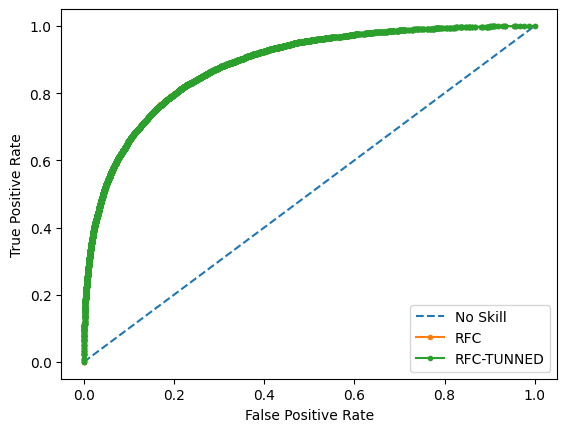

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

rfc_tunned_probs = rfc_tunned_model.predict_proba(df_test)
rfc_tunned_probs = rfc_tunned_probs[:, 1]
rfc_tunned_auc = roc_auc_score(y_test, rfc_tunned_probs)
rfc_tunned_fpr,rfc_tunned_tpr, _ = roc_curve(y_test, rfc_tunned_probs)

print('No Skill: ROC AUC=%{:.3f}'.format((ns_auc)*100))
print('RFC: ROC AUC=%{:.3f}'.format((rfc_auc)*100))
print('RFC-TUNNED: ROC AUC=%{:.3f}'.format((rfc_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='RFC')
plt.plot(rfc_tunned_fpr, rfc_tunned_tpr, marker='.', label=('RFC-TUNNED'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ***LOGISTIC REGRESSION CLASSIFIER***

In [0]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(df_train)), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           RainTomorrow   No. Observations:                99535
Model:                            GLM   Df Residuals:                    99496
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -36811.
Date:                Fri, 10 Apr 2020   Deviance:                       73622.
Time:                        14:44:46   Pearson chi2:                 1.00e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            5.8572      6.972      0.840      0.401      -7.809      19.523
Sunshine                        -0.4547      0.014    -31.640      0.000      -0.483      -0.427
Evaporation                      0.0137      0.016      0.885      0.376      -0.017       0.044
Pressure9am                     -0.0229      0.014     -1.657      0.097      -0.050       0.004
Pressure3pm                     -0.1619      0.016    -10.376      0.000      -0.192      -0.131
WindGustSpeed                    0.6979      0.014     51.518      0.000       0.671       0.724
Humidity3pm                      1.0284      0.019     54.715      0.000       0.992       1.065
Temp3pm                          0.0728      0.033      2.184      0.029       0.007       0.138
WindSpeed3pm                    -0.1693      0.012    -13.946      0.000      -0.193      -0.145
Humidity9am                      0.0314      0.018      1.785      0.074      -0.003       0.066
Rainfall                         0.3186      0.028     11.407      0.000       0.264       0.373
WindSpeed9am                    -0.0976      0.012     -7.990      0.000      -0.121      -0.074
Temp9am                          0.1678      0.038      4.387      0.000       0.093       0.243
MinTemp                          0.1115      0.028      4.017      0.000       0.057       0.166
MaxTemp                          0.0342      0.038      0.905      0.365      -0.040       0.108
Location_Kfold_Mean_Enc         -0.0576      0.011     -5.148      0.000      -0.080      -0.036
Month_Kfold_Mean_Enc             0.0579      0.011      5.060      0.000       0.035       0.080
Cloud9am                        -0.0237      0.005     -4.477      0.000      -0.034      -0.013
Year                            -0.0041      0.004     -1.107      0.268      -0.011       0.003
RainToday                       -0.1935      0.065     -2.974      0.003      -0.321      -0.066
Day                             -0.0006      0.001     -0.609      0.543      -0.003       0.001
Cloud3pm                         0.0755      0.005     14.032      0.000       0.065       0.086
E                                0.2718      0.437      0.622      0.534      -0.585       1.129
ENE                              0.3148      0.437      0.720      0.472      -0.542       1.172
ESE                              0.2140      0.438      0.489      0.625      -0.644       1.072
N                                0.7054      0.437      1.613      0.107      -0.152       1.562
NE                               0.1740      0.437      0.398      0.691      -0.683       1.031
NNE                              0.5883      0.437      1.345      0.179      -0.269       1.445
NNW                              0.8052      0.438      1.839      0.066    

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
logreg = LogisticRegression()
logreg.fit(df_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

No Skill: ROC AUC= %50.000
LOGREG: ROC AUC= %84.593


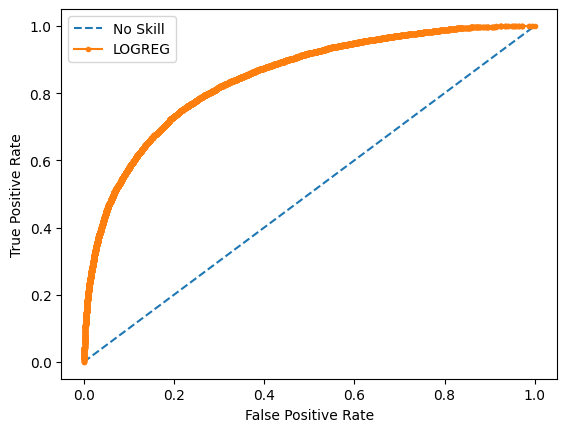

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

logreg_probs = logreg.predict_proba(df_test)
logreg_probs = logreg_probs[:, 1]
logreg_auc = roc_auc_score(y_test, logreg_probs)
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)


print('No Skill: ROC AUC= %{:.3f}'.format((ns_auc)*100))
print('LOGREG: ROC AUC= %{:.3f}'.format((logreg_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='LOGREG')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
logreg_tunned = LogisticRegression()
logreg_tunned_params = {"penalty": ['l1', 'l2', 'elasticnet'],
                        "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        "max_iter": [50,100,200],
                        "n_jobs" : [-1],
                        "C": [0.1,1,10]}

logreg_tunned_model = GridSearchCV(logreg_tunned, logreg_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(logreg_tunned_model.best_params_)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 365 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.4min finished


{'C': 10, 'max_iter': 100, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}


In [0]:
#{'C': 10, 'max_iter': 50, 'n_jobs': -1, 'penalty': 'l1', 'solver': 'liblinear'}

No Skill: ROC AUC= %50.000
LOGREG: ROC AUC= %84.593
LOGREG-TUNNED: ROC AUC= %85.319


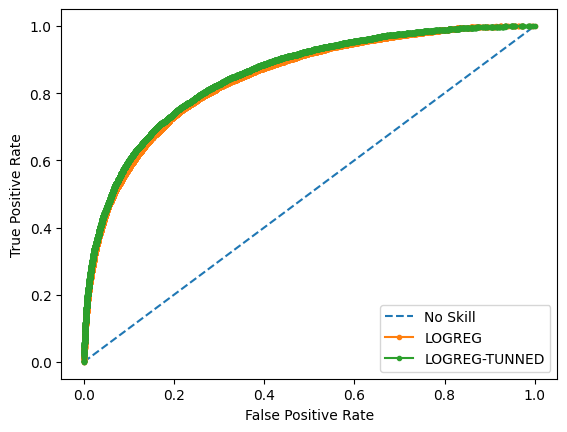

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

logreg_tunned_probs = logreg_tunned_model.predict_proba(df_test)
logreg_tunned_probs = logreg_tunned_probs[:, 1]
logreg_tunned_auc = roc_auc_score(y_test, logreg_tunned_probs)
logreg_tunned_fpr, logreg_tunned_tpr, _ = roc_curve(y_test, logreg_tunned_probs)


print('No Skill: ROC AUC= %{:.3f}'.format((ns_auc)*100))
print('LOGREG: ROC AUC= %{:.3f}'.format((logreg_auc)*100))
print('LOGREG-TUNNED: ROC AUC= %{:.3f}'.format((logreg_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(logreg_fpr, logreg_tpr, marker='.', label='LOGREG')
plt.plot(logreg_tunned_fpr, logreg_tunned_tpr, marker='.', label='LOGREG-TUNNED')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## DECISION TREE CLASSIFIER

In [0]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier().fit(df_train,y_train)

No Skill: ROC AUC= % 50.00
DT: ROC AUC= % 69.80


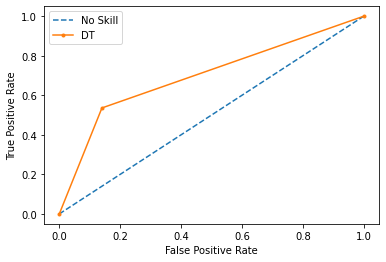

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

dt_probs = dt.predict_proba(df_test)
dt_probs = dt_probs[:, 1]
dt_auc = roc_auc_score(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

print('No Skill: ROC AUC= % {:.2f}'.format((ns_auc)*100))
print('DT: ROC AUC= % {:.2f}'.format((dt_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
dt_tunned = DecisionTreeClassifier()
dt_tunned_params = {"criterion" :['gini', 'entropy'],
                    "max_features": ['auto', 'sqrt', 'log2',None]}

dt_tunned_model = GridSearchCV(dt_tunned, dt_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(dt_tunned_model.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    7.6s finished


{'criterion': 'entropy', 'max_features': None}


In [0]:
#{'criterion': 'entropy', 'max_features': None}

No Skill: ROC AUC= % 50.00
DT: ROC AUC= % 69.80
DT-TUNNED: ROC AUC= % 69.60


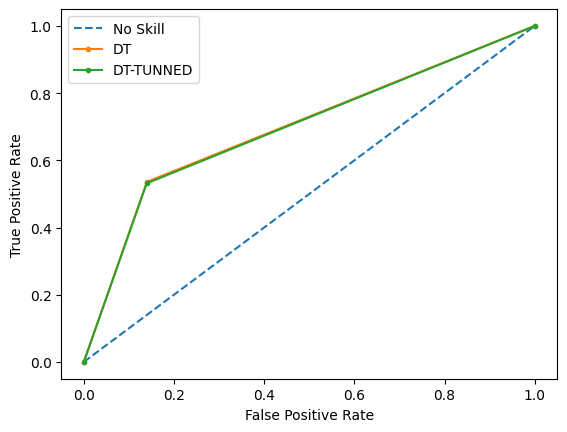

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

dt_tunned_probs = dt_tunned_model.predict_proba(df_test)
dt_tunned_probs = dt_tunned_probs[:, 1]
dt_tunned_auc = roc_auc_score(y_test, dt_tunned_probs)
dt_tunned_fpr, dt_tunned_tpr, _ = roc_curve(y_test, dt_tunned_probs)

print('No Skill: ROC AUC= % {:.2f}'.format((ns_auc)*100))
print('DT: ROC AUC= % {:.2f}'.format((dt_auc)*100))
print('DT-TUNNED: ROC AUC= % {:.2f}'.format((dt_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='.', label='DT')
plt.plot(dt_tunned_fpr, dt_tunned_tpr, marker='.', label='DT-TUNNED')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ***NEURAL NETWORKS CLASSIFIERS***

### ***MULTI-LAYER PERCEPTRON (MLP)***

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier().fit(df_train,y_train)

No Skill: ROC AUC= % 50.00
MLP: ROC AUC= % 85.31


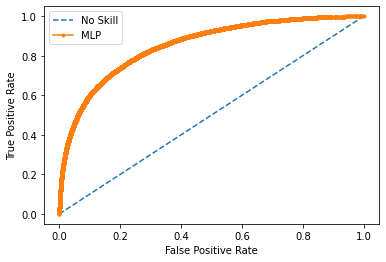

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

mlp_probs = mlp.predict_proba(df_test)
mlp_probs = mlp_probs[:, 1]
mlp_auc = roc_auc_score(y_test, mlp_probs)
mlp_fpr, mlp_tpr, _ = roc_curve(y_test, mlp_probs)

print('No Skill: ROC AUC= % {:.2f}'.format((ns_auc)*100))
print('MLP: ROC AUC= % {:.2f}'.format((mlp_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### *HYPERPARAMETER TUNNING*

In [0]:
from sklearn.model_selection import GridSearchCV
mlp_tunned = MLPClassifier()
mlp_tunned_params = {"activation":['identity', 'logistic', 'tanh', 'relu']}

mlp_tunned_model = GridSearchCV(mlp_tunned, mlp_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(mlp_tunned_model.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   58.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   58.7s finished


{'activation': 'logistic'}


In [0]:
from sklearn.model_selection import GridSearchCV
mlp_tunned = MLPClassifier()
mlp_tunned_params = {"solver":['lbfgs', 'sgd', 'adam']}

mlp_tunned_model = GridSearchCV(mlp_tunned, mlp_tunned_params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2).fit(df_train,y_train)
print(mlp_tunned_model.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    8.9s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   12.6s finished


{'solver': 'adam'}


In [0]:
#{'activation': 'logistic'}{'solver': 'adam'}

In [0]:
mlp_tunned = MLPClassifier(solver='adam',activation='logistic').fit(df_train,y_train)

No Skill: ROC AUC= % 50.00
MLP: ROC AUC= % 85.31
MLP-TUNNED: ROC AUC= % 86.02


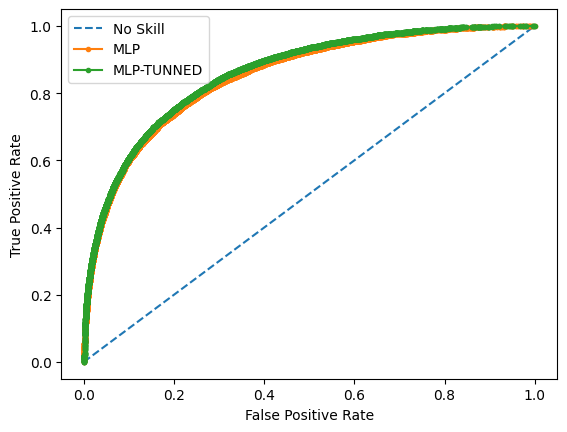

In [0]:
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

mlp_tunned_probs = mlp_tunned.predict_proba(df_test)
mlp_tunned_probs = mlp_tunned_probs[:, 1]
mlp_tunned_auc = roc_auc_score(y_test, mlp_tunned_probs)
mlp_tunned_fpr, mlp_tunned_tpr, _ = roc_curve(y_test, mlp_tunned_probs)

print('No Skill: ROC AUC= % {:.2f}'.format((ns_auc)*100))
print('MLP: ROC AUC= % {:.2f}'.format((mlp_auc)*100))
print('MLP-TUNNED: ROC AUC= % {:.2f}'.format((mlp_tunned_auc)*100))

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(mlp_fpr, mlp_tpr, marker='.', label='MLP')
plt.plot(mlp_tunned_fpr, mlp_tunned_tpr, marker='.', label='MLP-TUNNED')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# **COMPARISON ACCURACY OF DIFFERENT CLASSIFICATION MODEL ALGORITHMS**

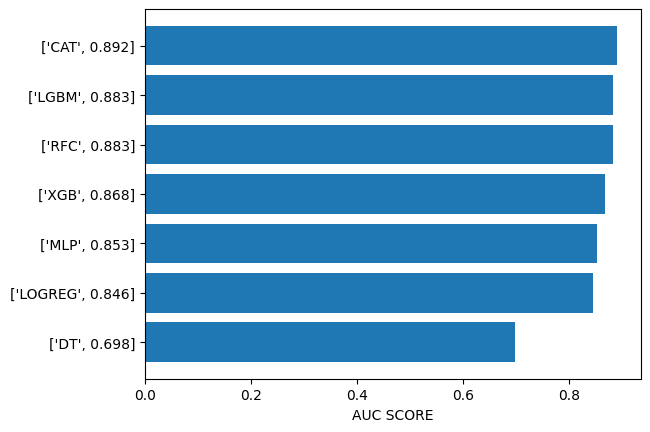

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['CAT',round(catboost_auc,3)],['LGBM',round(lgbm_auc,3)], ['RFC',round(rfc_auc,3)], ['XGB',round(xgb_auc,3)], ['MLP',round(mlp_auc,3)], ['LOGREG',round(logreg_auc,3)],['DT',round(dt_auc,3)])
y_pos = np.arange(7)

performance = np.array([catboost_auc,lgbm_auc,rfc_auc,xgb_auc,mlp_auc,logreg_auc,dt_auc])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AUC SCORE')

plt.show()

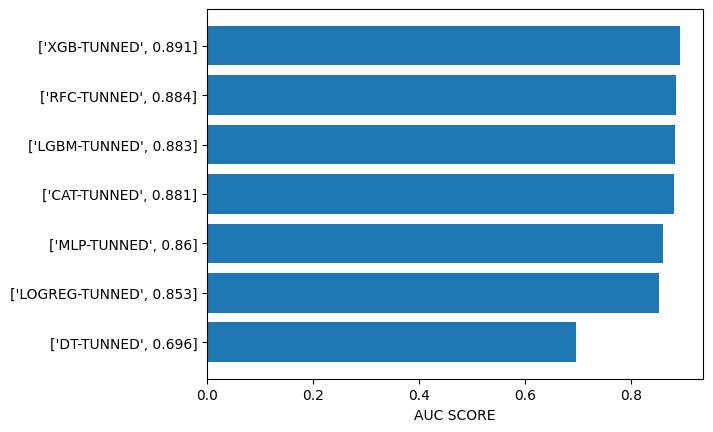

In [0]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['XGB-TUNNED',round(xgb_tunned_auc,3)],['RFC-TUNNED',round(rfc_tunned_auc,3)],['LGBM-TUNNED',round(lgbm_tunned_auc,3)],['CAT-TUNNED',round(catboost_tunned_auc,3)], ['MLP-TUNNED',round(mlp_tunned_auc,3)], ['LOGREG-TUNNED',round(logreg_tunned_auc,3)],['DT-TUNNED',round(dt_tunned_auc,3)])
y_pos = np.arange(7)

performance = np.array([xgb_tunned_auc,rfc_tunned_auc,lgbm_tunned_auc,catboost_tunned_auc,mlp_tunned_auc,logreg_tunned_auc,dt_tunned_auc])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AUC SCORE')

plt.show()

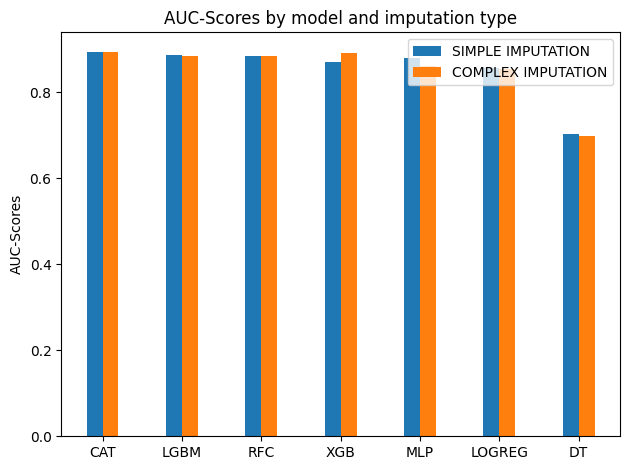

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['CAT','LGBM', 'RFC', 'XGB', 'MLP','LOGREG','DT']
SI_means = [catboost1_auc,lgbm1_auc,rfc1_auc,xgb1_auc,mlp1_auc,logreg1_auc,dt1_auc]
complex_means = [catboost1_auc,lgbm_auc,rfc_tunned_auc,xgb_tunned_auc,mlp_tunned_auc,logreg_tunned_auc,dt_auc]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, SI_means, width, label='SIMPLE IMPUTATION')
rects2 = ax.bar(x + width/2, complex_means, width, label='COMPLEX IMPUTATION')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC-Scores')
ax.set_title('AUC-Scores by model and imputation type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()